In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# using only Age and income variable for easy visualisation
X = df.iloc[:, [2,3]].values

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 30):
    #init="k-means++": selects initial cluster centroids using sampling based on an empirical probability distribution of the points
    #centroids are selected where there are more points
    #One can use "random" initialization as well
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

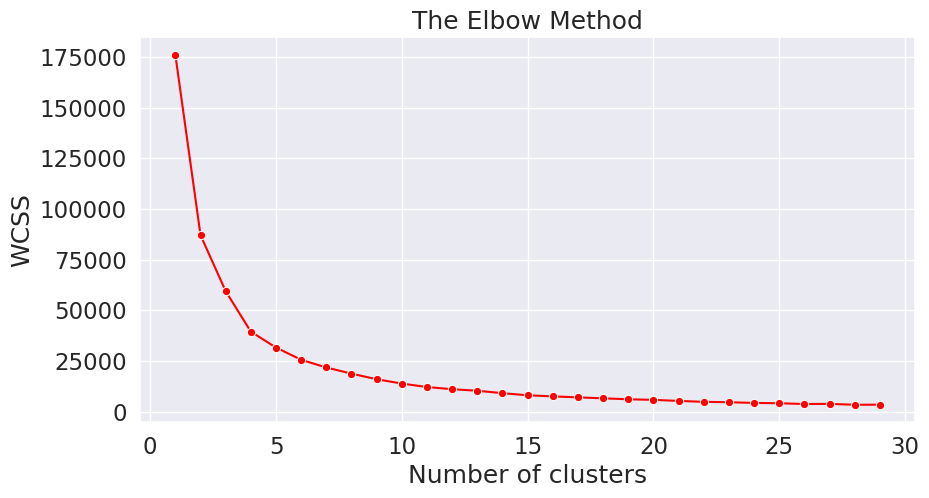

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 30), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# using only Age and income variable for easy visualisation
min_scal = MinMaxScaler()
#its important to scale the data because the scale of age and income are totaly different. in such cases, like distances based algms , you should always scake the data
X_scaled = min_scal.fit_transform(X)
X_scaled2 = pd.DataFrame(X_scaled, columns=['Age','Annual Income (k$)'])

# Fitting K-Means to the dataset
kmeans_scaled = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

#init: Number of time the k-means algorithm will be run with different centroid seeds.
#The final results will be the best output of n_init consecutive runs in terms of inertia
#kmeans_scaled = KMeans(n_clusters = 5, init = 'random', random_state = 1000, n_init=1)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

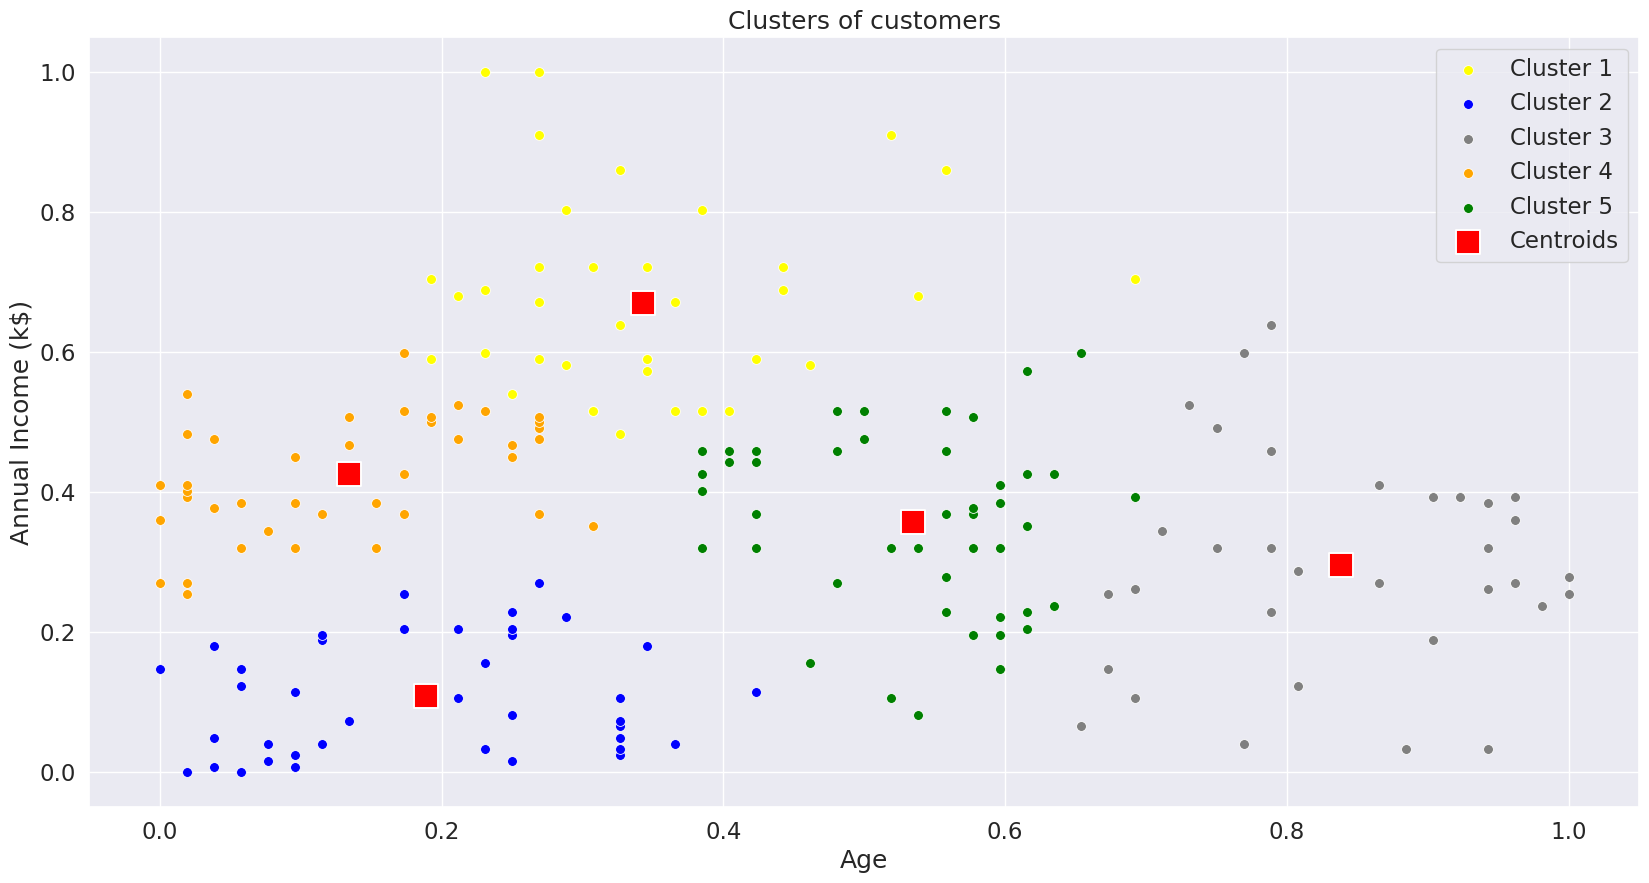

In [ ]:
# Visualising the clusters
# Scaling of variables doesn't change the clutering but just the visualization
plt.figure(figsize=(20,10))
#here we are taking only age and income so that we can visualize the
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 0, 0], y=X_scaled[y_kmeans_scaled == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 1, 0], y=X_scaled[y_kmeans_scaled == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 2, 0], y=X_scaled[y_kmeans_scaled == 2, 1], color = 'grey', label = 'Cluster 3',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 3, 0], y=X_scaled[y_kmeans_scaled == 3, 1], color = 'orange', label = 'Cluster 4',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 4, 0], y=X_scaled[y_kmeans_scaled == 4, 1], color = 'green', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans_scaled.cluster_centers_[:, 0], y=kmeans_scaled.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

##Clustering with age and spending score

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# prompt: Using dataframe df: select column age and spending_score and assign it to X

X = df[['Age', 'Spending Score (1-100)']]


In [ ]:
wcss = []

for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

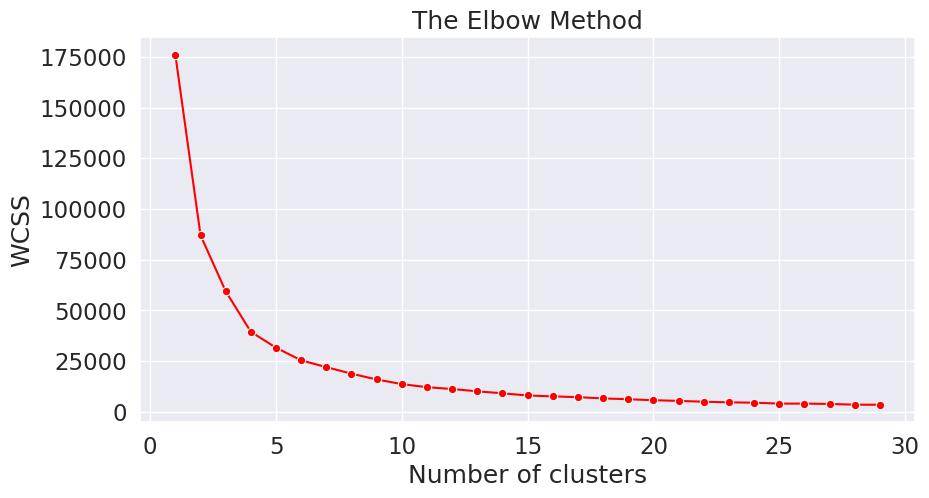

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 30), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# using only Age and income variable for easy visualisation
min_scal = MinMaxScaler()
#its important to scale the data because the scale of age and income are totaly different. in such cases, like distances based algms , you should always scake the data
X_scaled = min_scal.fit_transform(X)
X_scaled2 = pd.DataFrame(X_scaled, columns=['Age','Annual Income (k$)'])

# Fitting K-Means to the dataset
kmeans_scaled = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

#init: Number of time the k-means algorithm will be run with different centroid seeds.
#The final results will be the best output of n_init consecutive runs in terms of inertia
#kmeans_scaled = KMeans(n_clusters = 5, init = 'random', random_state = 1000, n_init=1)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

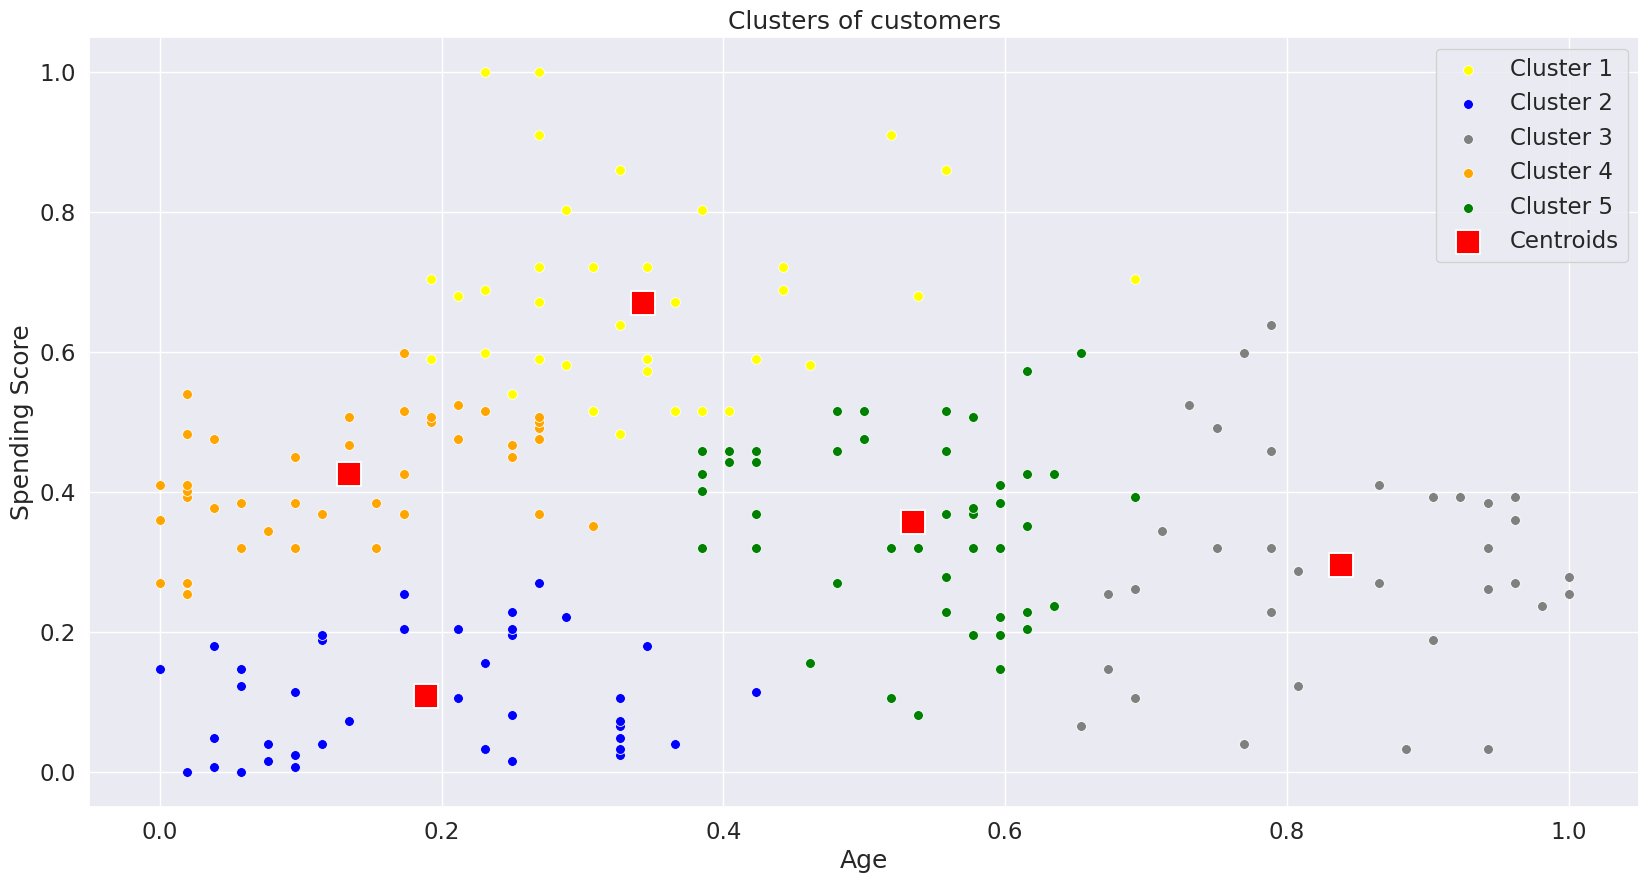

In [ ]:
# Visualising the clusters
# Scaling of variables doesn't change the clutering but just the visualization
plt.figure(figsize=(20,10))
#here we are taking only age and income so that we can visualize the
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 0, 0], y=X_scaled[y_kmeans_scaled == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 1, 0], y=X_scaled[y_kmeans_scaled == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 2, 0], y=X_scaled[y_kmeans_scaled == 2, 1], color = 'grey', label = 'Cluster 3',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 3, 0], y=X_scaled[y_kmeans_scaled == 3, 1], color = 'orange', label = 'Cluster 4',s=50)
sns.scatterplot(x=X_scaled[y_kmeans_scaled == 4, 0], y=X_scaled[y_kmeans_scaled == 4, 1], color = 'green', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans_scaled.cluster_centers_[:, 0], y=kmeans_scaled.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')
plt.grid(True)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()